Projeto feito durante o curso de Análise de dados da Data Science Academy 
- Fonte: https://www.datascienceacademy.com.br/

In [1]:
!pip install -q yfinance

In [2]:
!pip install -q pandas_datareader

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [4]:
AZN = "AZN" 

In [5]:
# Fazendo o Download em tempo real
AZN = yfinance.download(AZN)

[*********************100%***********************]  1 of 1 completed


In [6]:
AZN.shape

(7261, 6)

In [7]:
AZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-05-12,5.291667,5.291667,5.020833,5.041667,1.817252,414000
1993-05-13,5.000000,5.000000,4.791667,4.854167,1.749668,792600
1993-05-14,4.875000,4.875000,4.791667,4.791667,1.727140,646200
1993-05-17,4.833333,4.895833,4.833333,4.895833,1.764687,68400
1993-05-18,4.895833,4.895833,4.833333,4.854167,1.749668,69000


In [8]:
AZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7.261000e+03
mean,25.519589,25.710871,25.336203,25.530467,17.375643,2.864075e+06
std,11.827755,11.910955,11.733892,11.817910,13.478470,3.374107e+06
min,4.479167,4.500000,4.479167,4.479167,1.614501,2.400000e+03
25%,19.875000,20.049999,19.687500,19.879999,9.103075,8.532000e+05
50%,23.405001,23.565001,23.250000,23.424999,12.625706,2.159400e+06
75%,30.865000,31.100000,30.660000,30.900000,24.558378,3.714400e+06
max,63.950001,64.940002,63.509998,63.830002,62.791473,6.554020e+07


In [9]:
AZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7261 entries, 1993-05-12 to 2022-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7261 non-null   float64
 1   High       7261 non-null   float64
 2   Low        7261 non-null   float64
 3   Close      7261 non-null   float64
 4   Adj Close  7261 non-null   float64
 5   Volume     7261 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 397.1 KB


In [10]:
conn = sqlite3.connect("dados/AZN.db")
c = conn.cursor()

In [11]:
AZN.to_sql("AZN", conn, if_exists = 'replace')

In [12]:
# Visualização dos dados
c.execute("""SELECT * FROM AZN""")
rows = c.fetchall()
rows

[('1993-05-12 00:00:00',
  5.2916669845581055,
  5.2916669845581055,
  5.0208330154418945,
  5.0416669845581055,
  1.8172516822814941,
  414000),
 ('1993-05-13 00:00:00',
  5.0,
  5.0,
  4.7916669845581055,
  4.8541669845581055,
  1.749668002128601,
  792600),
 ('1993-05-14 00:00:00',
  4.875,
  4.875,
  4.7916669845581055,
  4.7916669845581055,
  1.7271398305892944,
  646200),
 ('1993-05-17 00:00:00',
  4.8333330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8958330154418945,
  1.7646865844726562,
  68400),
 ('1993-05-18 00:00:00',
  4.8958330154418945,
  4.8958330154418945,
  4.8333330154418945,
  4.8541669845581055,
  1.749668002128601,
  69000),
 ('1993-05-19 00:00:00',
  4.8541669845581055,
  4.875,
  4.8541669845581055,
  4.875,
  1.757177472114563,
  72000),
 ('1993-05-20 00:00:00',
  4.875,
  4.8958330154418945,
  4.8541669845581055,
  4.875,
  1.757177472114563,
  118800),
 ('1993-05-21 00:00:00', 4.875, 4.875, 4.875, 4.875, 1.757177472114563, 13200),
 ('1993-05-24

In [13]:
# Salvando em disco
AZN.to_excel("dados/AZN.xls")

In [14]:
# Carregando do disco
df = pd.read_excel("dados/AZN.xls")

In [15]:
df['Date']

0      1993-05-12
1      1993-05-13
2      1993-05-14
3      1993-05-17
4      1993-05-18
          ...    
7256   2022-03-04
7257   2022-03-07
7258   2022-03-08
7259   2022-03-09
7260   2022-03-10
Name: Date, Length: 7261, dtype: datetime64[ns]

In [16]:
df['Close']

0        5.041667
1        4.854167
2        4.791667
3        4.895833
4        4.854167
          ...    
7256    57.470001
7257    56.500000
7258    57.689999
7259    60.430000
7260    60.900002
Name: Close, Length: 7261, dtype: float64

### Gráfico de linhas

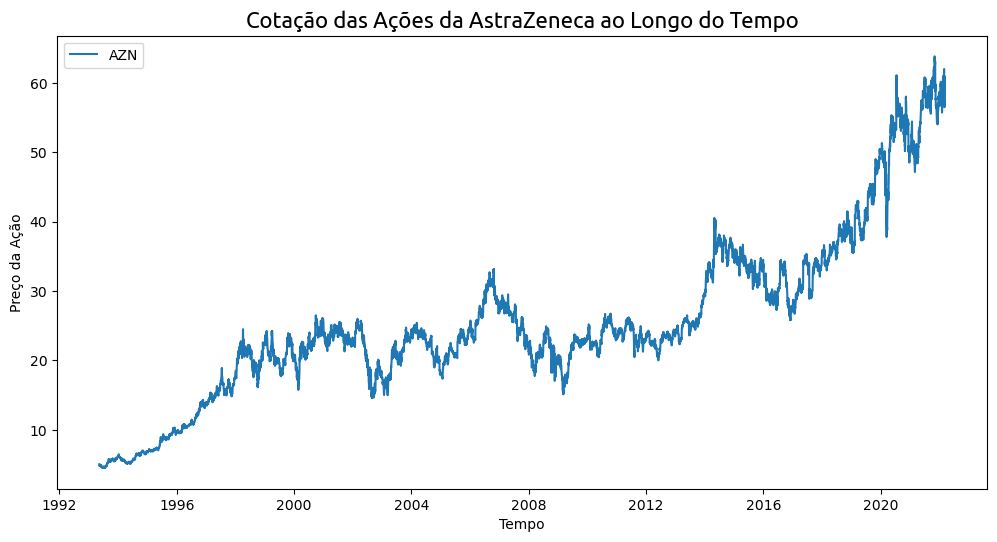

In [17]:
# Dados
x = df['Date']
y = df['Close']

# Tamanho do gráfico (dpi especifica pixels por polegada)
plt.figure(figsize = (12,6), dpi = 100)

# Plot
plt.plot(x, y, label = 'AZN')

# Título
plt.title('Cotação das Ações da AstraZeneca ao Longo do Tempo', 
          fontdict = {'fontname': 'Ubuntu', 'fontsize': 16})

# Label
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação')

# Legenda
plt.legend()

# Salvando a figura com alta resolução
plt.savefig('imagens/dataviz12.png', dpi = 300)

# Plot
plt.show()